In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from keras.datasets import mnist
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Load MNIST data using Keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Convert labels to PyTorch tensors
train_labels = torch.from_numpy(train_labels)
test_labels = torch.from_numpy(test_labels)

# Convert images to PyTorch tensors
train_images = torch.from_numpy(train_images)
test_images = torch.from_numpy(test_images)

# Create DataLoader
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)  # Reshape input for CNN
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
cnn_model = CNN()

# Define the optimizer and loss function
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [4]:
# Instantiate the basic CNN model
basic_cnn_model = CNN()

# Define the optimizer and loss function
optimizer = optim.Adam(basic_cnn_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [6]:
epochs = 10
basic_cnn_loss = []
basic_cnn_acc = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}:")
    basic_cnn_model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = basic_cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    basic_cnn_loss.append(running_loss / len(train_loader))
    accuracy = 100 * correct / total
    basic_cnn_acc.append(accuracy)
    print('  Loss: {:.4f}. Accuracy: {:.2f}%'.format(running_loss / len(train_loader), accuracy))


Epoch 1/10:
  Loss: 0.0432. Accuracy: 98.62%
Epoch 2/10:
  Loss: 0.0295. Accuracy: 99.07%
Epoch 3/10:
  Loss: 0.0246. Accuracy: 99.21%
Epoch 4/10:
  Loss: 0.0187. Accuracy: 99.39%
Epoch 5/10:
  Loss: 0.0164. Accuracy: 99.47%
Epoch 6/10:
  Loss: 0.0129. Accuracy: 99.59%
Epoch 7/10:
  Loss: 0.0117. Accuracy: 99.61%
Epoch 8/10:
  Loss: 0.0089. Accuracy: 99.68%
Epoch 9/10:
  Loss: 0.0092. Accuracy: 99.71%
Epoch 10/10:
  Loss: 0.0077. Accuracy: 99.73%


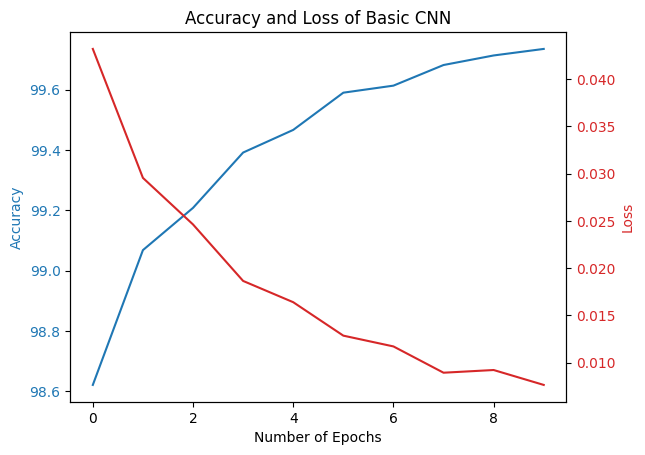

In [9]:

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot accuracy on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(basic_cnn_acc, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis for loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loss', color=color)
ax2.plot(basic_cnn_loss, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title
plt.title('Accuracy and Loss of Basic CNN')

# Show plot
plt.show()


Actual Label: 1, Predicted Label: 1


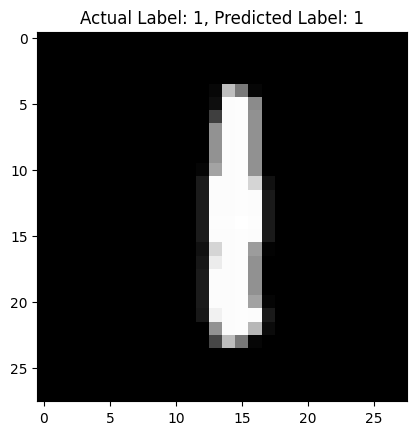

In [11]:
# Making predictions on a sample test image
sample_index = 267
sample_image, sample_label = test_dataset[sample_index]
output = basic_cnn_model(sample_image.unsqueeze(0))
_, predicted_class = torch.max(output, 1)
print(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")

sample_image = sample_image.numpy().reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")
plt.show()

In [12]:
# Define the CNN model with Batch Normalization
class CNNWithBatchNorm(nn.Module):
    def __init__(self):
        super(CNNWithBatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)  # Reshape input for CNN
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [13]:
# Instantiate the CNN with Batch Normalization model
cnn_with_batchnorm_model = CNNWithBatchNorm()

# Define the optimizer and loss function for CNN with Batch Normalization
optimizer_bn = optim.Adam(cnn_with_batchnorm_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [14]:
# Training the CNN with Batch Normalization model
epochs = 10
cnn_bn_loss = []
cnn_bn_acc = []

for epoch in range(epochs):
    cnn_with_batchnorm_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        optimizer_bn.zero_grad()
        outputs = cnn_with_batchnorm_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_bn.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    cnn_bn_loss.append(running_loss / len(train_loader))
    accuracy = 100 * correct / total
    cnn_bn_acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch+1, running_loss / len(train_loader), accuracy))


Epoch: 1. Loss: 0.1209426395337421. Accuracy: 96.29166666666667
Epoch: 2. Loss: 0.04700192385566618. Accuracy: 98.55
Epoch: 3. Loss: 0.032714855531249185. Accuracy: 98.99
Epoch: 4. Loss: 0.02654371204270511. Accuracy: 99.145
Epoch: 5. Loss: 0.022077985458346994. Accuracy: 99.265
Epoch: 6. Loss: 0.017552493045928978. Accuracy: 99.45
Epoch: 7. Loss: 0.01429953045090345. Accuracy: 99.5
Epoch: 8. Loss: 0.013017233157942426. Accuracy: 99.55166666666666
Epoch: 9. Loss: 0.010416130240719648. Accuracy: 99.64833333333333
Epoch: 10. Loss: 0.010460256872329944. Accuracy: 99.62833333333333


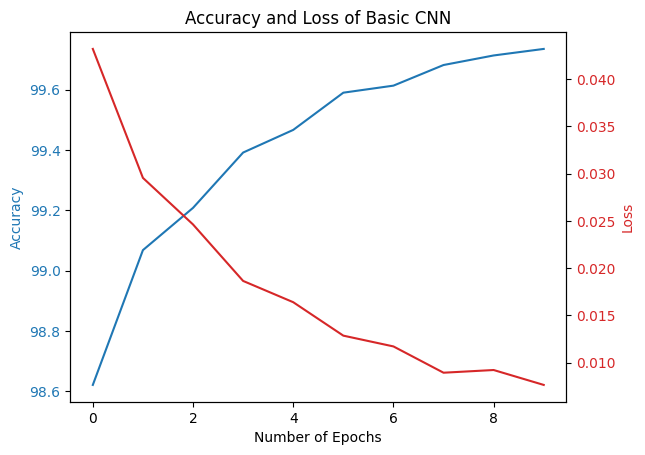

In [15]:

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot accuracy on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(basic_cnn_acc, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis for loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loss', color=color)
ax2.plot(basic_cnn_loss, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title
plt.title('Accuracy and Loss of Basic CNN')

# Show plot
plt.show()


Actual Label: 1, Predicted Label: 1


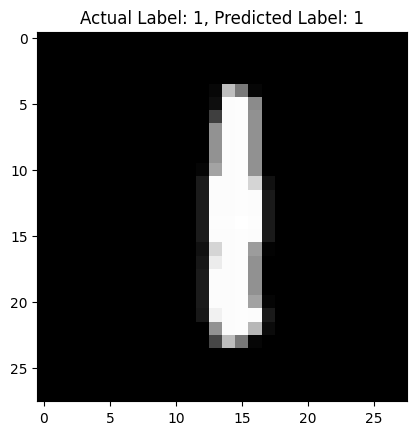

In [16]:
# Making predictions on a sample test image
sample_index = 267
sample_image, sample_label = test_dataset[sample_index]
output = cnn_with_batchnorm_model(sample_image.unsqueeze(0))
_, predicted_class = torch.max(output, 1)
print(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")

sample_image = sample_image.numpy().reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")
plt.show()